In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
from mlxtend.classifier import StackingCVClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv("/content/drive/MyDrive/framingham.csv") # Reading and converting the data into a pandas dataframe
data.shape # Calculating the dimensions of the dataset

(4238, 16)

In [3]:
data.head(10)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
data.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
data.duplicated().sum()


0

In [7]:
print((data["glucose"].mode())[0])


75.0


In [8]:
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)


In [9]:
data.dropna(inplace=True)
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

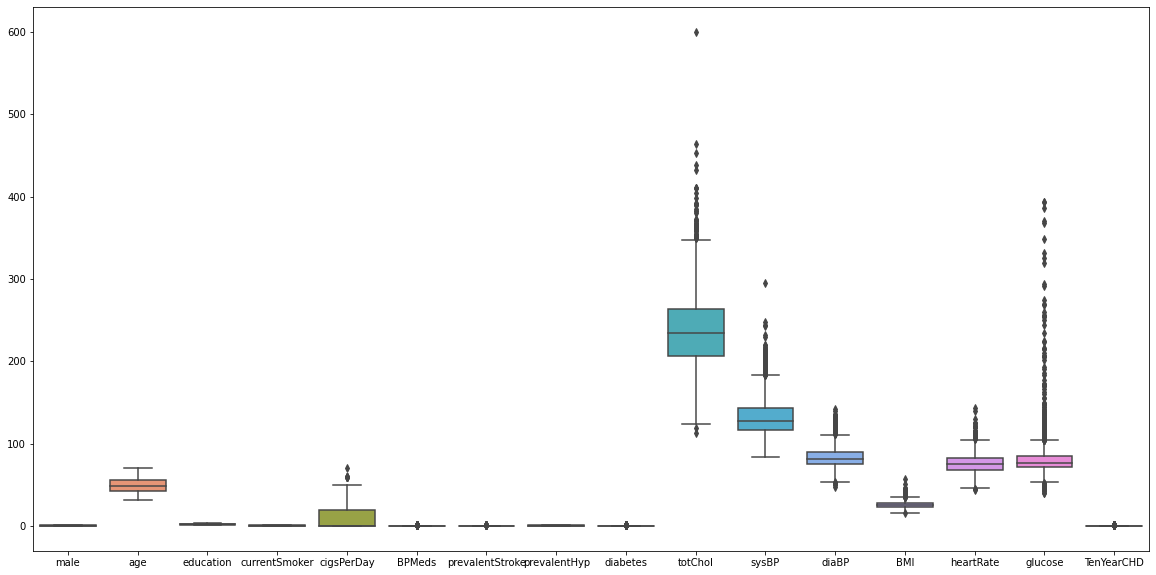

In [10]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

In [11]:
data['totChol'].max()


600.0

In [12]:
data['sysBP'].max()


295.0

In [13]:
data = data[data['totChol']<600.0]
data = data[data['sysBP']<295.0]
data.shape

(3985, 16)

In [14]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=data.iloc[:,0:15]
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (3985, 15) 
y -  (3985,)


In [15]:

#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [16]:
fit=best.fit(X,y)


In [17]:

data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [18]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature       Score
10         sysBP  656.124805
14       glucose  364.680511
1            age  306.721359
4     cigsPerDay  227.615756
9        totChol  195.125045
11         diaBP  143.981628
7   prevalentHyp   84.260440
5         BPMeds   31.451679
8       diabetes   28.859275
0           male   19.319438
12           BMI   13.282437


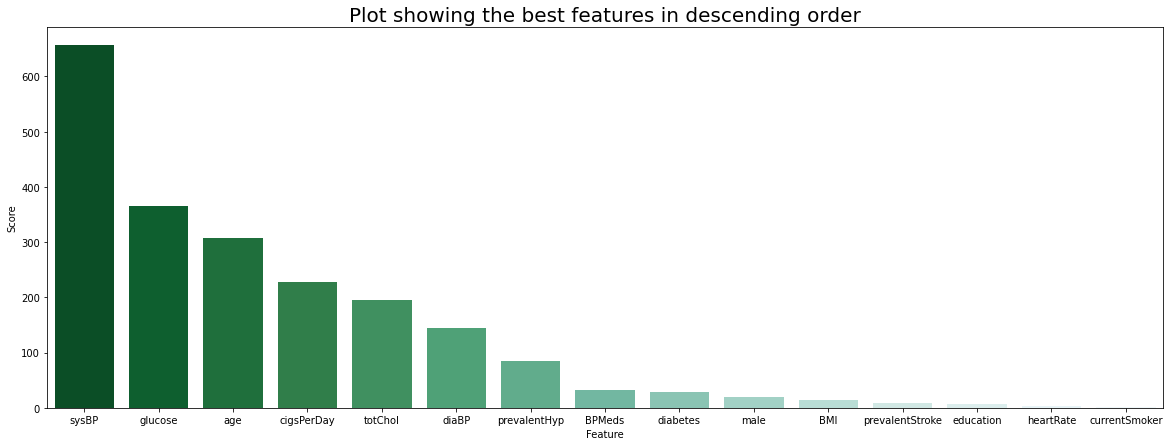

In [19]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

In [20]:

#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['sysBP',
 'glucose',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'BPMeds',
 'diabetes',
 'male']

In [21]:
data=data[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
data.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
3,150.0,103.0,61,30.0,225.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0


In [22]:

y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [23]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [24]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[1363    1]
 [ 222    8]]


Accuracy of Logistic Regression: 86.01003764115433 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1364
           1       0.89      0.03      0.07       230

    accuracy                           0.86      1594
   macro avg       0.87      0.52      0.50      1594
weighted avg       0.86      0.86      0.80      1594



In [25]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[1188  176]
 [ 169   61]]


Accuracy of k-NN Classification: 78.35633626097867 

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1364
           1       0.26      0.27      0.26       230

    accuracy                           0.78      1594
   macro avg       0.57      0.57      0.57      1594
weighted avg       0.79      0.78      0.78      1594



In [26]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[1355    9]
 [ 216   14]]


Accuracy of Random Forest: 85.88456712672522 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1364
           1       0.61      0.06      0.11       230

    accuracy                           0.86      1594
   macro avg       0.74      0.53      0.52      1594
weighted avg       0.83      0.86      0.81      1594



In [27]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[1160  204]
 [ 180   50]]


Accuracy of DecisionTreeClassifier: 75.90966122961103 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1364
           1       0.20      0.22      0.21       230

    accuracy                           0.76      1594
   macro avg       0.53      0.53      0.53      1594
weighted avg       0.77      0.76      0.76      1594



In [28]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confussion matrix
[[1346   18]
 [ 209   21]]


Accuracy of Gradient Boosting Classifier: 85.75909661229612 

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1364
           1       0.54      0.09      0.16       230

    accuracy                           0.86      1594
   macro avg       0.70      0.54      0.54      1594
weighted avg       0.82      0.86      0.81      1594



In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [31]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(rf_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(test_x, test_y)))
rf_predicted = rf_hyper.predict(test_x)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(test_y, rf_predicted))

Accuracy on training set is : 0.8849853617733167
Accuracy on validation set is : 0.8582183186951067
Accuracy of Hyper-tuned Random Forest Classifier: 85.82183186951067 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1364
           1       0.64      0.04      0.07       230

    accuracy                           0.86      1594
   macro avg       0.75      0.52      0.50      1594
weighted avg       0.83      0.86      0.80      1594



In [32]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [33]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [34]:
gb_hyper = gb_random.best_estimator_
gb_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(gb_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(gb_hyper.score(test_x, test_y)))
gbc_predicted = gb_hyper.predict(test_x)
gbc_acc_score = accuracy_score(test_y, gbc_predicted)
print("Accuracy of Hyper-tuned Gradient Boosting Classifier:",gbc_acc_score*100,'\n')
print(classification_report(test_y, gbc_predicted))

Accuracy on training set is : 1.0
Accuracy on validation set is : 0.8268506900878294
Accuracy of Hyper-tuned Gradient Boosting Classifier: 82.68506900878295 

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1364
           1       0.29      0.14      0.19       230

    accuracy                           0.83      1594
   macro avg       0.58      0.54      0.55      1594
weighted avg       0.78      0.83      0.80      1594



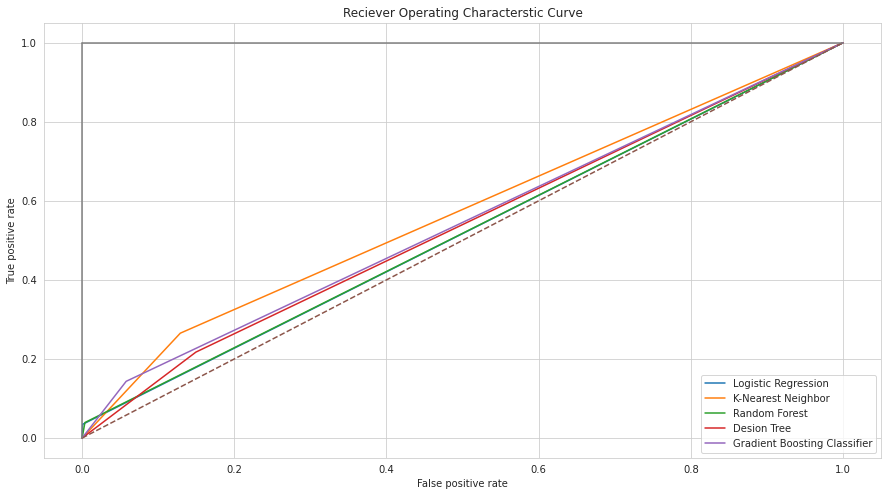

In [35]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(test_y,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(test_y,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(test_y,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(test_y,dt_predicted)
gbc_false_positive_rate,gbc_true_positive_rate,gbc_threshold = roc_curve(test_y,gbc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(gbc_false_positive_rate,gbc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [36]:

model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest',
                                   'Decision Tree','Gradient Boosting'], 'Accuracy': [lr_acc_score*100, knn_acc_score*100, 
                                                                                      rf_acc_score*100, dt_acc_score*100,gbc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.010038
1,K-Nearest Neighbour,78.356336
2,Random Forest,85.821832
3,Decision Tree,75.909661
4,Gradient Boosting,82.685069


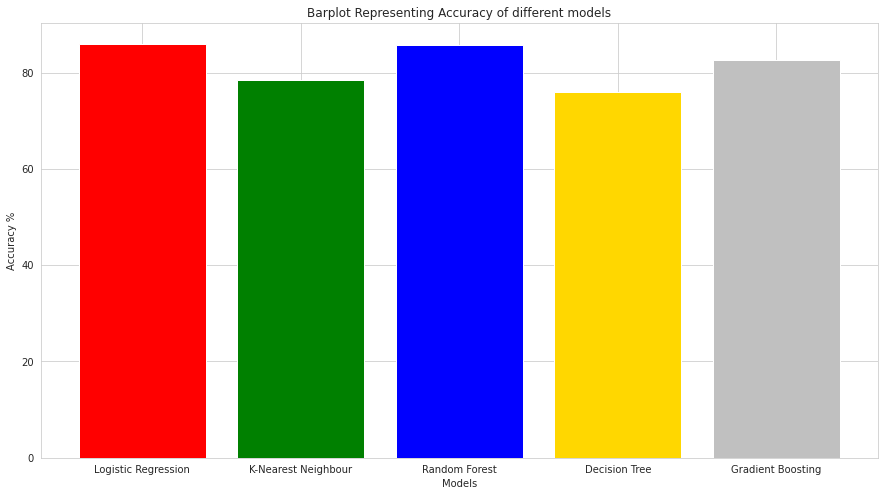

In [37]:
colors = ['red','green','blue','gold','silver']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [38]:
scv=StackingCVClassifier(classifiers=[rf_hyper, gb_hyper, knn, dt], meta_classifier= rf)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)
scv.fit(train_x.values,train_y.values)
scv_predicted = scv.predict(test_x)
scv_conf_matrix = confusion_matrix(test_y, scv_predicted)
scv_acc_score = accuracy_score(test_y, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(test_y,scv_predicted))

confussion matrix
[[1360    4]
 [ 223    7]]


Accuracy of StackingCVClassifier: 85.75909661229612 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1364
           1       0.64      0.03      0.06       230

    accuracy                           0.86      1594
   macro avg       0.75      0.51      0.49      1594
weighted avg       0.83      0.86      0.80      1594



In [40]:
model_ev = model_ev.append({"Model":"Stacking Ensemble", "Accuracy":scv_acc_score*100}, ignore_index=True)
model_ev

,Model,Accuracy
0,Logistic Regression,86.010038
1,K-Nearest Neighbour,78.356336
2,Random Forest,85.821832
3,Decision Tree,75.909661
4,Gradient Boosting,82.685069
5,Stacking Ensemble,85.759097
6,Stacking Ensemble,85.759097


In [41]:
import pickle


In [44]:
file=open("HD check2.pkl","wb")
pickle.dump(scv,file)
file.close()

In [45]:

picklefile=pickle.load(open("HD check2.pkl","rb"))
pred=picklefile.predict(test_x)